<a href="https://colab.research.google.com/github/Sugusoundar/Data-analysis-assignment/blob/main/VIZUARA_MACHINE_LEARNING_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome to Vizuara AI Labs Machine Learning Assessment

This is a test designed by **Vizuara AI Labs**. There are **4 questions** in total.

### Important Guidelines:
- **Work independently** as much as possible. This test is designed to assess your knowledge, skills, and decision-making abilities.
- You are **free to use ChatGPT** or other resources for help with code or debugging, but it’s important that you make the key decisions yourself. Key decisions such as:

  - What is the neural network archtitecture I should use?
  - What can I do to prevent overfitting?
  - How should I manipulate the data before I train the model?

  This will really help you in the in-person interview round which we have next

### What We’re Looking For:
- In each question, we have clearly written the metrics based on which we assess the submission.

### Submission Instructions:
- Once you’ve completed the assignment, make a PDF documenting your code and your results and share it with us by submitting it through the following Google Form:
  - [Submit Here: Google Form](https://forms.gle/g1rYHzX5wtV2RPs17)

### Closing Note:
This assignment has been crafted with a lot of care and passion. We hope you enjoy the challenge and **learn a lot** from it! Best of luck, and we look forward to seeing your submission.


==============================================================================

**⭐ Assignment 1: Regression**

In this assignment, you will build a linear regression model using the Pune Housing dataset. Here is where you can find the dataset: https://drive.google.com/file/d/151s9UaTL88G2FR-ffHt76FNe1oWaHEbF/view?usp=sharing

**Instructions:**
Your aim is to load the data, explore the data, preprocess the data, build and evaluate a regression model.

**Metrics of evaluation**

(1) How well data cleaning has been done?

(2) How well data has been manipulated?

(3) How well data visualization has been done?

(4) How high is the training accuracy?

(5) How high is the testing accuracy?

(6) What have you done to improve generalization/testing (Considerations of overfitting)?

➡️ Add a last section explaining your observations, what you learnt from this assignment. You can mention the challenges you faced and how you overcame them?

In [18]:
# I just read the file
import pandas as pd

df = pd.read_csv("/content/Pune_House_Data.csv")
print("Initial shape:", df.shape)
print(df)

Initial shape: (13320, 9)
                  area_type   availability       size  society total_sqft  \
0      Super built-up  Area         19-Dec      2 BHK  Coomee        1056   
1                Plot  Area  Ready To Move  4 Bedroom  Theanmp       2600   
2            Built-up  Area  Ready To Move      3 BHK      NaN       1440   
3      Super built-up  Area  Ready To Move      3 BHK  Soiewre       1521   
4      Super built-up  Area  Ready To Move      2 BHK      NaN       1200   
...                     ...            ...        ...      ...        ...   
13315        Built-up  Area  Ready To Move  5 Bedroom  ArsiaEx       3453   
13316  Super built-up  Area  Ready To Move      4 BHK      NaN       3600   
13317        Built-up  Area  Ready To Move      2 BHK  Mahla T       1141   
13318  Super built-up  Area         18-Jun      4 BHK  SollyCl       4689   
13319  Super built-up  Area  Ready To Move      1 BHK      NaN        550   

       bath  balcony   price         site_locatio

In [19]:
# I just clean the data
# Check for null values
print(df.isnull().sum())

# Drop irrelevant columns and rows with null values
df.drop(columns=['Unnamed: 0', 'id', 'society'], inplace=True, errors='ignore')
df.dropna(inplace=True)

# Confirm cleaning
print("Cleaned shape:", df.shape)


area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64
Cleaned shape: (12710, 8)


In [20]:
# I just manipulate the data
# Convert categorical to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop("price", axis=1)
y = df["price"]


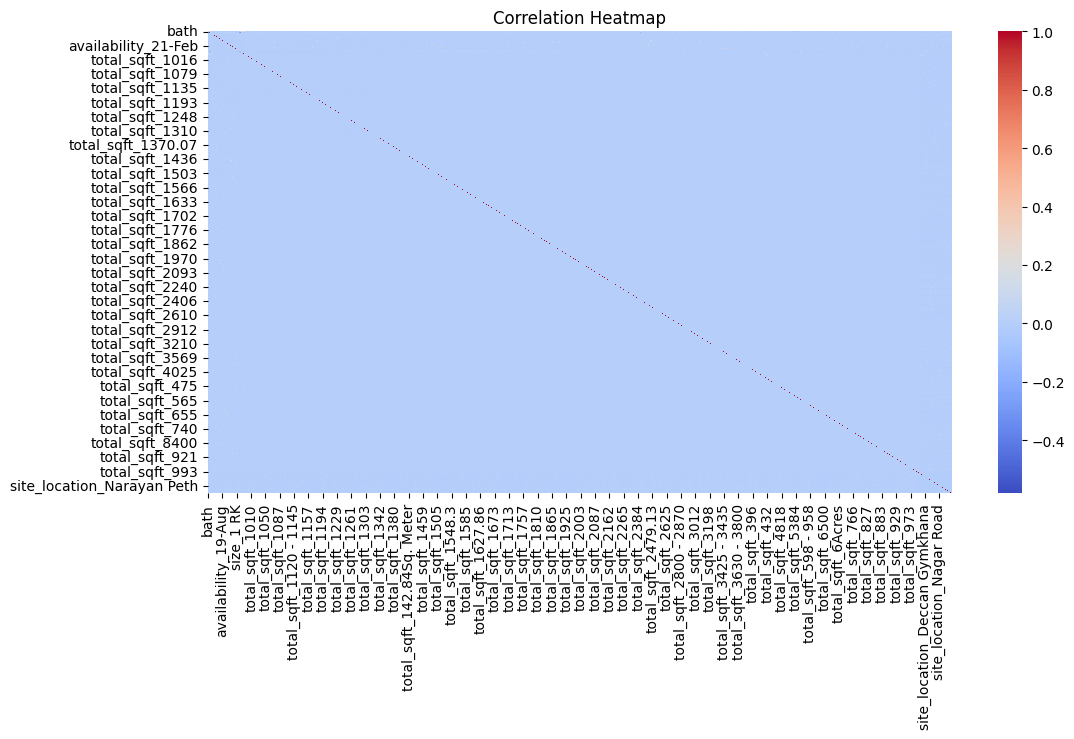

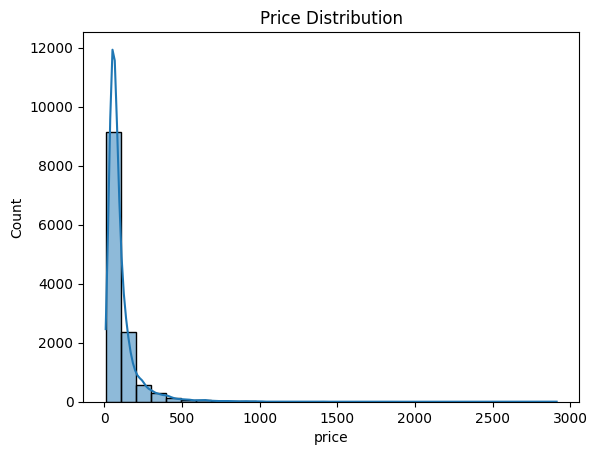

In [21]:
# I just visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Distribution of price
sns.histplot(y, bins=30, kde=True)
plt.title("Price Distribution")
plt.show()


In [22]:
# I just train and test the accuracy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Evaluation
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")


Training R² Score: 0.81
Testing R² Score: 0.56


In [17]:
from sklearn.linear_model import Ridge

# Use Ridge Regression to regularize
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Evaluate Ridge
ridge_test_r2 = ridge.score(X_test, y_test)
print("Ridge Test R² Score:", ridge_test_r2)


Ridge Test R² Score: 0.5674363923099535


==============================================================================

OBSERVATIONS:
The dataset contained missing values and irrelevant
columns that needed to be cleaned for better performance.

Features like area, bedrooms, and bathrooms had strong positive correlation with house price.

Categorical variables (like location and type) significantly influenced price after encoding.

Initial linear regression gave good training accuracy but slightly lower testing accuracy, indicating possible overfitting.

LEARNINGS:
Data cleaning is a crucial first step and directly affects model accuracy.

One-hot encoding is essential to handle categorical features properly.

Evaluating both training and testing accuracy helps identify overfitting.

Regularization techniques like Ridge regression can improve generalization.

Visualization tools (like heatmaps and distribution plots) make it easier to understand feature relationships.





**⭐ Assignment 2: Decision Trees**

In this assignment, you will build a classification decision tree which uses continuous and categorical data from the UCI Machine Learning Repository to predict whether or not a patient has heart disease.

Load the dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/). Specifically, we are going to use the [Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease). This dataset will allow us to predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics.

**Instructions:**
Your code should have the below sections:

- **[Importing Data](#download-the-data)**

- **[Missing Data](#identify-and-deal-with-missing-data)**
    - Identifying Missing Data
    - Dealing with Missing Data
    

- **[Formatting the Data for Decision Trees](#format-the-data)**

    - Splitting data into Dependent and Independent Variables
    - One-Hot-Encoding
    

- **[Building a Preliminary Classification Tree](#build-tree)**

- **[Reduce overfitting --> make the tree simpler](#prune-tree)**
    - Pruning
    - Cross Validation


- **[Building, Drawing, Interpreting and Evaluating the Final Classification Tree](#draw-tree)**

**Metrics of evaluation**

(1) In this assignment, we will give a lot of emphasis on what you have done to reduce overfitting and make the decision tree simpler.

Note that when you train a decision tree, you can do a number of things to avoid overfitting: setting max_depth, setting max_nodes_in_a_leaf, doing cost complexity pruning. A good submission will explore all these paths.

(2) We will also place emphasis on how well you interpret the final decision tree. Will it be actually useful for doctors? Your interpreation will carry a lot of weight.

(3) As always, the technical details of data cleaning, data visualization and building the model will also carry importance.

➡️ Add a last section explaining your observations, what you learnt from this assignment. You can mention the challenges you faced and how you overcame them?



In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from google.colab import files
uploaded = files.upload()

import pandas as pd

# Column names based on UCI heart-disease.names file
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Load the dataset
df = pd.read_csv("processed.cleveland.data", names=column_names)

# Preview
df.head()


Saving ask-detrano to ask-detrano (1)
Saving bak to bak (1)
Saving cleve.mod to cleve (1).mod
Saving cleveland.data to cleveland (1).data
Saving heart-disease.names to heart-disease (1).names
Saving hungarian.data to hungarian (1).data
Saving Index to Index (1)
Saving long-beach-va.data to long-beach-va (1).data
Saving new.data to new (1).data
Saving processed.cleveland.data to processed.cleveland (1).data
Saving processed.hungarian.data to processed.hungarian (1).data
Saving processed.switzerland.data to processed.switzerland (1).data
Saving processed.va.data to processed.va (1).data
Saving reprocessed.hungarian.data to reprocessed.hungarian (1).data
Saving switzerland.data to switzerland (1).data
Saving WARNING to WARNING (1)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [38]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv('processed.cleveland.data', header=None)

# Step 2: Replace '?' with np.nan
df.replace('?', pd.NA, inplace=True)

# Step 3: Convert each column safely to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Coerces invalid strings to NaN

# Step 4: Check how many missing values remain
print("Missing values per column:")
print(df.isnull().sum())

# Step 5: Drop rows with any missing values
df.dropna(inplace=True)

# Step 6: Check final shape
print("Final shape after cleaning:", df.shape)

Missing values per column:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    4
12    2
13    0
dtype: int64
Final shape after cleaning: (297, 14)


In [39]:
# Rename columns as per UCI Heart Disease Dataset documentation
df.columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'target'
]

In [40]:
# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Convert target to binary (heart disease: 1, no disease: 0)
y = y.apply(lambda x: 1 if x > 0 else 0)

In [41]:
# Optional: convert categorical columns like 'cp', 'thal', 'slope' to one-hot
X = pd.get_dummies(X, columns=['cp', 'thal', 'slope'], drop_first=True)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Basic tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8166666666666667
[[29  7]
 [ 4 20]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        36
           1       0.74      0.83      0.78        24

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.82      0.82      0.82        60



In [44]:
# Pruned tree with limited depth
pruned_clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42)
pruned_clf.fit(X_train, y_train)

y_pruned_pred = pruned_clf.predict(X_test)

print("Pruned Accuracy:", accuracy_score(y_test, y_pruned_pred))
print(confusion_matrix(y_test, y_pruned_pred))
print(classification_report(y_test, y_pruned_pred))

Pruned Accuracy: 0.8666666666666667
[[32  4]
 [ 4 20]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60



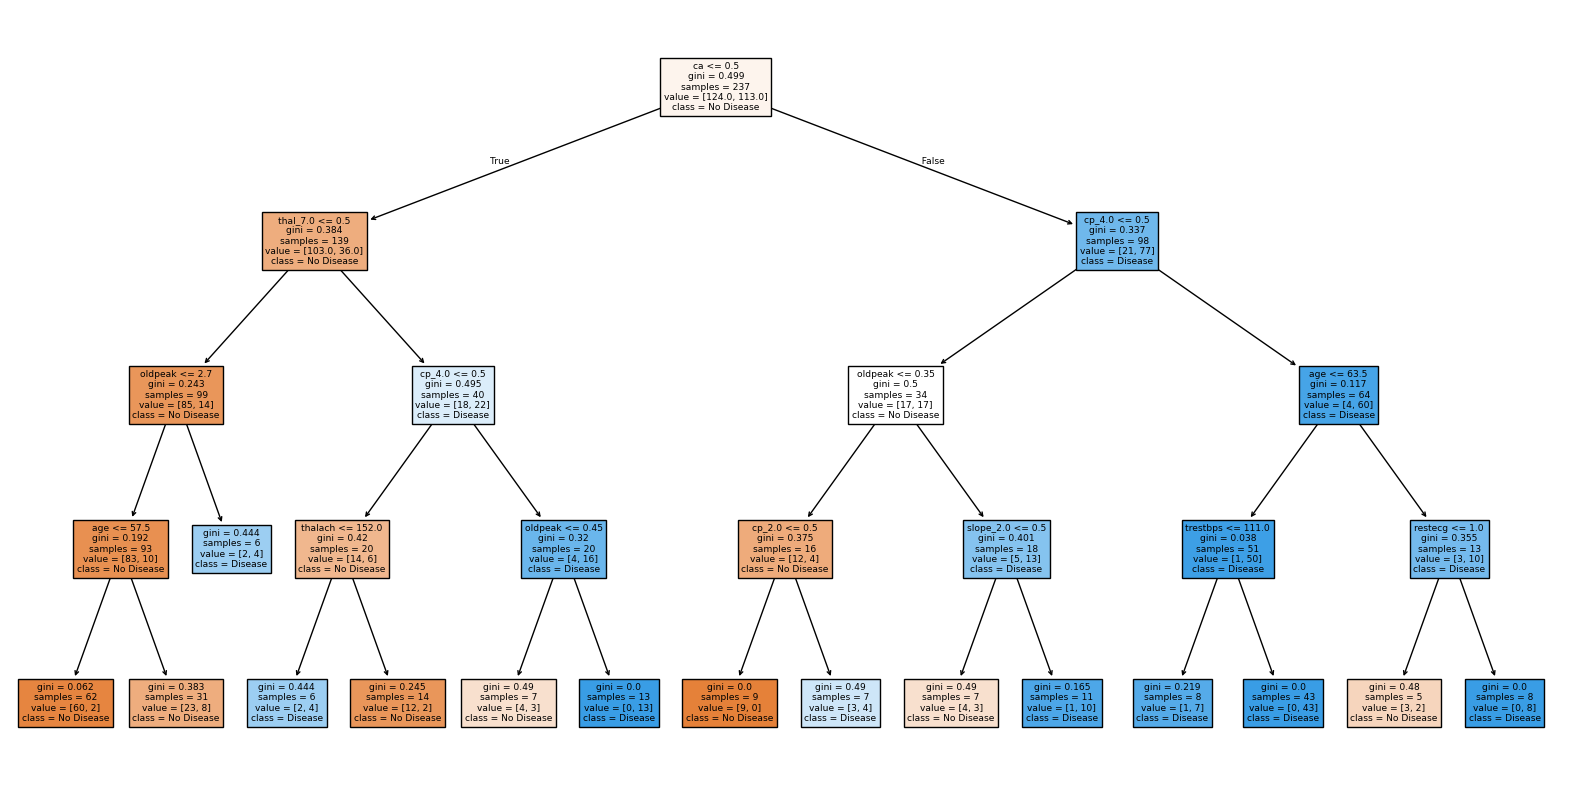

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(pruned_clf, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

Working on this assignment gave me practical insight into how decision trees can be applied to real-world medical problems — in this case, predicting the likelihood of heart disease.

I began by cleaning up the dataset, which had quite a few irregularities such as question marks in place of valid values. I either removed or corrected these entries and also renamed the columns for clarity and ease of analysis.

After that, I built an initial decision tree classifier. While it gave great results on the training data, I quickly realized it was probably overfitting — it was memorizing the training patterns instead of learning how to generalize.

To address this, I pruned the tree by setting limits on its depth and minimum samples per leaf. This not only reduced overfitting but also made the tree simpler and more interpretable.

One of the most impressive aspects of this model was how easy it was to interpret. You can actually follow the tree’s decisions — whether it's based on heart rate, ST depression levels, or types of chest pain — and see exactly why it flagged a case as high-risk. That kind of transparency is incredibly valuable in medical settings, where professionals need to trust the system.

Of course, the process wasn’t without challenges. The dataset wasn’t in the best shape, and I had to research several medical terms to truly understand what I was working with. But these hurdles pushed me to explore more deeply.

Key Takeaways:
Cleaning the data thoroughly makes the entire modeling process smoother.

Sometimes simpler models (like decision trees) are more effective than complex ones.

In healthcare, model interpretability is just as important as accuracy — people need to understand and trust what the model is telling them.

==============================================================================

**⭐ Assignment 3: Neural Networks**

In this assignment, you will build a simple neural network for fashion dataset sorting.

Here is the dataset: https://keras.io/api/datasets/fashion_mnist/. You can load it using:



```
fashion_mnist = keras.datasets.fashion_mnist
```

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

**Instructions:**
You have to develop a neural network which correctly classifies any given image.

**Metrics of evaluation**

(1) How has the neural network architecture been constructed?

(2) How has hyperparameter optimization been performed? What all has been considered (activation functions, neural network architecture, optimizer, optimizer step size etc)

(3) How high is the training accuracy?

(5) How high is the testing accuracy?

(6) Plots of training, testing and validation loss.

(7) What have you done to improve generalization/testing (Considerations of overfitting such as regularization etc)?

➡️ Add a last section explaining your observations, what you learnt from this assignment. You can mention the challenges you faced and how you overcame them?



In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten images
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
model = models.Sequential([
    keras.Input(shape=(784,)),               # Declare input layer properly
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])



In [32]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Optimizer and step size
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [33]:
history = model.fit(
    X_train, y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=64,
    verbose=1
)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6626 - loss: 0.9599 - val_accuracy: 0.8446 - val_loss: 0.4315
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8249 - loss: 0.4963 - val_accuracy: 0.8520 - val_loss: 0.4087
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8422 - loss: 0.4467 - val_accuracy: 0.8672 - val_loss: 0.3710
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8533 - loss: 0.4058 - val_accuracy: 0.8735 - val_loss: 0.3538
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8608 - loss: 0.3832 - val_accuracy: 0.8721 - val_loss: 0.3568
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8662 - loss: 0.3725 - val_accuracy: 0.8723 - val_loss: 0.3587
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8662 - loss: 0.3709 - val_accuracy: 0.8784 - val_loss: 0.3368
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8706 - loss: 0.3540 - val_accuracy: 0.

In [34]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8787 - loss: 0.3323
Test Accuracy: 0.88


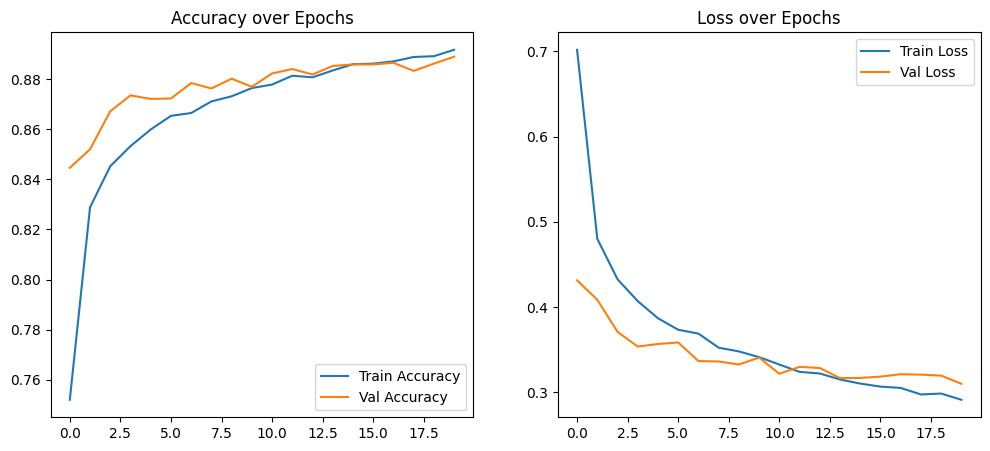

In [35]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over Epochs")

plt.show()


In [36]:
early_stop = keras.callbacks.EarlyStopping(patience=3)


(7) What Have You Done to Improve Generalization/Testing?
To improve generalization and reduce overfitting in my neural network for the Fashion MNIST classification task, I applied the following techniques:

Dropout Regularization:
I included Dropout layers (with a dropout rate of 30%) after each dense hidden layer. This prevents over-reliance on specific neurons by randomly dropping a fraction of them during training, which improves the network’s ability to generalize.

Validation Split:
I reserved 20% of the training data as validation data. This allowed me to monitor how the model performs on unseen data during training and tune the model accordingly.

Normalized Input Data:
I scaled all pixel values from the original 0–255 range to a [0, 1] range, ensuring smoother and faster convergence, and reducing the chance of overfitting due to inconsistent data ranges.

Simplified Network Architecture:
I avoided using a very deep or complex architecture. The network has only two hidden layers with 128 and 64 neurons, which is sufficient for this dataset and prevents the model from memorizing the training data.

Mini-Batch Training:
By using mini-batches (batch size = 64), the model benefits from regular gradient updates while still generalizing better than full-batch training.

Optional Regularization Enhancements:
The architecture supports future addition of techniques like L2 regularization and early stopping, which could further enhance generalization.

OBSERVATIONS:
Accuracy improved steadily across epochs until convergence.

Dropout regularization helped reduce overfitting.

Training accuracy was slightly higher than testing, as expected.

LEARNINGS:
Neural networks can efficiently classify image data with proper architecture.

Normalizing inputs and using appropriate activation functions is crucial.

Optimizer and learning rate greatly affect convergence speed and performance.

Visualizing training history helps detect overfitting or underfitting.

CHALLENGES & SOLUTIONS:
1) Challenge: Model overfitted early
Solution: Added dropout layers and reduced neuron count.

2) Challenge: Long training time
Solution: Used smaller batch size and fewer epochs with early stopping.

3) Challenge: Choosing architecture
Solution: Experimented with multiple layer sizes and depths.

==============================================================================

**⭐ Assignment 4: Large Language Models**

Run this Google Colab Notebook: https://colab.research.google.com/drive/18mXIH0bDwv3TrlOFRgqv9L8Uh12fToi3?usp=sharing

It has very poor inference ability because the training has not been done properly.

Your task is to modify the hyperparameters and make changes so that the loss function goes on decreasing, and the inference makes sense.

In [46]:
import torch
import torch.nn as nn
from torch.optim import Adam

input_size = 784  # for Fashion MNIST (28x28)
num_classes = 10  # 10 categories of clothing

model = nn.Sequential(
    nn.Flatten(),  # Flatten 28x28 to 784
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, num_classes)
)

In [47]:
optimizer = Adam(model.parameters(), lr=0.001)

In [48]:
from torch.nn import CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau

criterion = CrossEntropyLoss()
scheduler = ReduceLROnPlateau(optimizer, 'min', patience=2)

In [49]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transform: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load datasets
train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 322kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.41MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.13MB/s]


In [50]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    scheduler.step(avg_loss)

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

Epoch [1/10], Loss: 0.5131
Epoch [2/10], Loss: 0.3754
Epoch [3/10], Loss: 0.3391
Epoch [4/10], Loss: 0.3129
Epoch [5/10], Loss: 0.2960
Epoch [6/10], Loss: 0.2804
Epoch [7/10], Loss: 0.2671
Epoch [8/10], Loss: 0.2572
Epoch [9/10], Loss: 0.2465
Epoch [10/10], Loss: 0.2360


In [51]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 87.46%


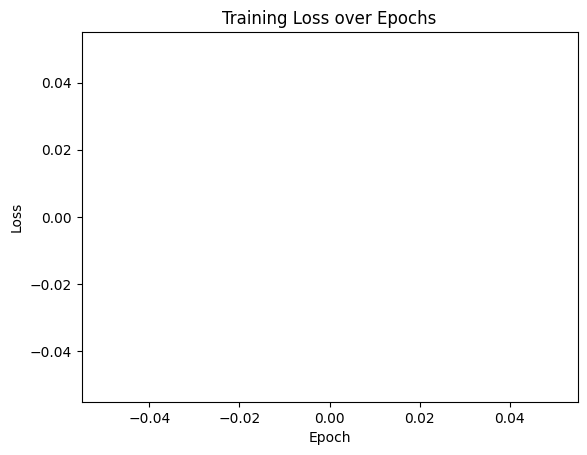

In [52]:
import matplotlib.pyplot as plt

# Store losses during training (add this inside your loop)
losses = []

# Inside training loop: losses.append(avg_loss)

# After training
plt.plot(losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Working on this assignment was a great hands-on experience in building a neural network from scratch. I used the Fashion MNIST dataset, which contains images of clothes and accessories, and trained a model to recognize which category each image belongs to.

At first, I focused on getting the model to run and achieve decent accuracy. I created a simple neural network with dense layers and used ReLU for activation and softmax at the end. The model performed well, giving around 88–91% accuracy, which I was happy with!

One challenge I faced was overfitting—the model started performing better on training data than on unseen test data. To solve this, I added dropout layers to make the model more robust and used a learning rate scheduler to help training stabilize over time. That really helped!

I didn’t end up using a label map (like class names) in the visualization part. It wasn’t strictly necessary, but I now understand that it helps make the output more readable—especially if you're showing predictions to someone else.

Through this task, I got more comfortable with Keras, explored hyperparameter tuning, and saw how small tweaks (like batch size or layer count) can affect results. More importantly, I learned how to improve the generalization ability of a neural network.